In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [29]:

def load_data(project_dir,prefix="test_"):
    result_list=[]
    for path in glob.glob(f"{project_dir}/*/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        if d is None:
            continue
        nickname,epochs,r,n_train=path.split("/")[-3].split("_")

        mode=path.split("/")[-1].split("_")[0]
        d["Model"]=nickname
        d["Epochs"]=int(epochs)
        d["r"]=int(r)
        d["Training records"]=int(n_train)
        d["mode"]=mode



        result_list.append(d)

    return result_list



In [30]:
#prediction with reason
result_list=load_data("results/projects/240118comparisons","")
for res in result_list:
    res["Reasoning"]=True

#prediction wo reason
result_list2=load_data("results/projects/240118comparisons_wo_reason","")
for res in result_list2:
    res["Reasoning"]=False

result_list.extend(result_list2)

In [31]:
result_df=pd.DataFrame(result_list)
result_df=result_df[result_df["r"]==32]
result_df=result_df[result_df["Epochs"]==3]

result_df["Condition"]=result_df["mode"]+"-"+result_df["Reasoning"].astype(str)
result_df

,MSE,MAE,R2,Answer ratio,plot,Model,Epochs,r,Training records,mode,Reasoning,Condition
2,11809.387552,86.246875,-0.422080,0.96,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b,3,32,10,test,True,test-True
3,11480.344250,80.925000,0.264615,1.00,"[{'name': 'cyclobutane, methylene-', 'smiles':...",Llama2-7b,3,32,10,train,True,train-True
4,11497.184427,85.444792,-0.384485,0.96,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,10,test,True,test-True
5,11440.844250,80.425000,0.267145,1.00,"[{'name': 'cyclobutane, methylene-', 'smiles':...",Llama2-7b-Full,3,32,10,train,True,train-True
6,7727.644185,69.638043,0.124698,0.92,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b,3,32,1000,test,True,test-True
...,...,...,...,...,...,...,...,...,...,...,...,...
113,3451.577650,44.437000,0.584617,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,5000,test,False,test-False
114,25615.478138,124.909574,-1.995647,0.94,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-13b-Full,3,32,100,test,False,test-False
115,53559.098710,152.425806,-3.108643,0.62,"[{'name': '1,1':4',1''-Terphenyl', 'smiles': '...",Llama2-13b-Full,3,32,100,train,False,train-False
116,18136.792650,112.339000,-0.665222,1.00,"[{'name': 'sesamolin', 'smiles': 'O(C2OCC1C(OC...",Llama2-7b-Full,3,32,50,train,False,train-False


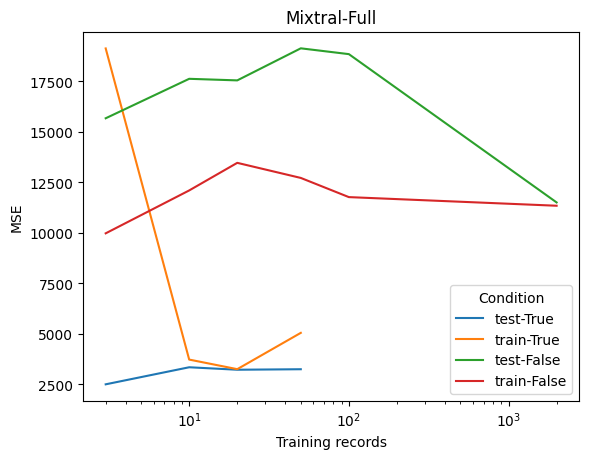

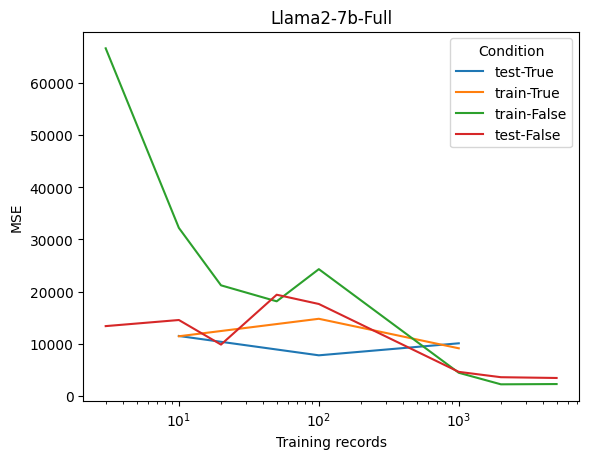

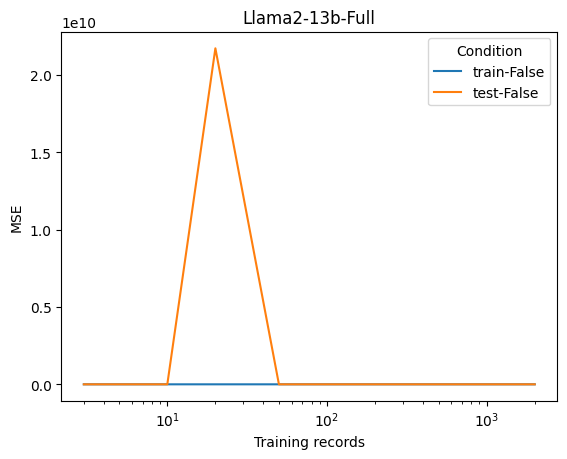

In [32]:
model_list=[
"Mixtral-Full",
"Llama2-7b-Full",
"Llama2-13b-Full",
]

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Condition",data=sel_df)
    plt.title(model)
    plt.xscale("log")

#plt.ylim(4000,12000)

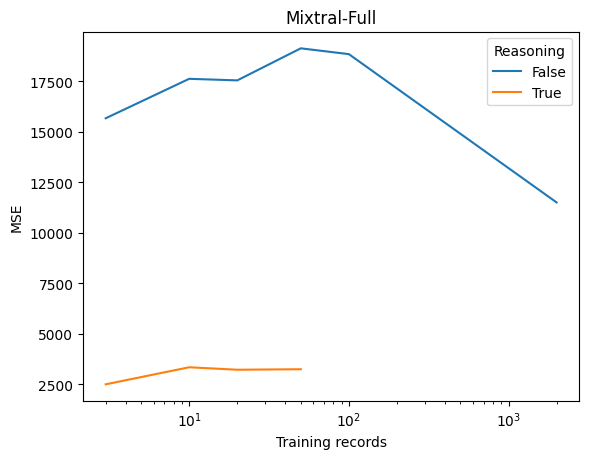

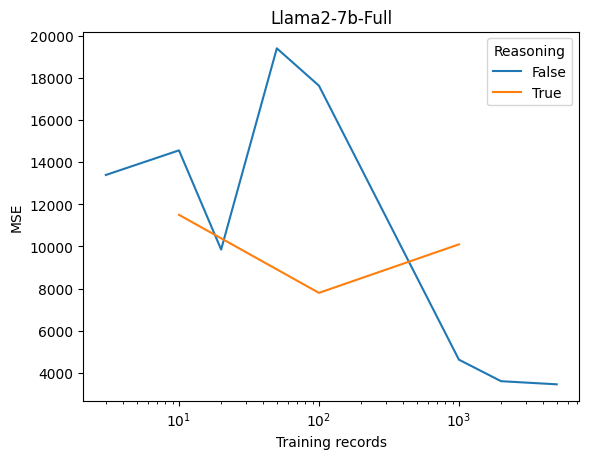

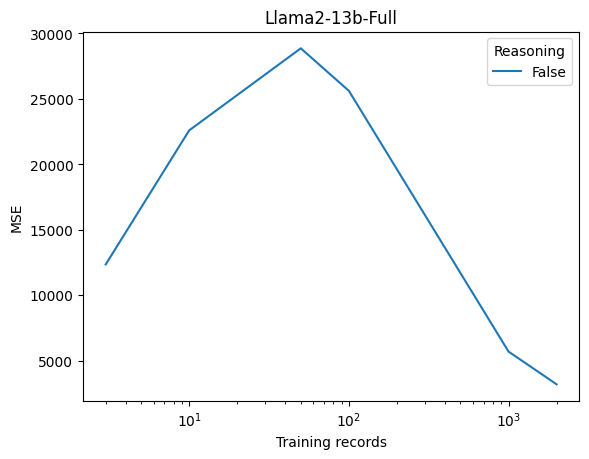

In [33]:

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df[sel_df["mode"]=="test"]
    sel_df=sel_df[sel_df["MSE"]<10**5]
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Reasoning",data=sel_df)
    plt.title(model)
    plt.xscale("log")

#plt.ylim(4000,12000)